In [38]:
import os
import keras
import pandas
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [39]:
# Define paths to dataset
path_to_test = "../data/raw/test.csv"
path_to_train = "../data/raw/train.csv"

# Validate paths to data
print(f"Path to test.csv -> {'VALID' if os.path.exists(path_to_test) else 'INVALID'}")
print(f"Path to train.csv -> {'VALID' if os.path.exists(path_to_train) else 'INVALID'}")

Path to test.csv -> VALID
Path to train.csv -> VALID


In [40]:
# Load csvs into DataFrame
test_df = pandas.read_csv(path_to_test)
train_df = pandas.read_csv(path_to_train)

In [41]:
# Show shape of dataset (rows x columns)
print(f"Test shape -> {test_df.shape}")
print(f"Train shape -> {train_df.shape}")

Test shape -> (2947, 563)
Train shape -> (7352, 563)


In [42]:
# Test for duplicates
print(f"Duplicates in test -> {test_df.duplicated().sum()}")
print(f"Duplicates in train -> {train_df.duplicated().sum()}")

Duplicates in test -> 0
Duplicates in train -> 0


In [43]:
# Check columns with duplicate labels
print(f"Duplicate columns in test -> {len(test_df.columns[test_df.T.duplicated().tolist()])}")
print(f"Duplicate columns in train -> {len(train_df.columns[train_df.T.duplicated().tolist()])}")

Duplicate columns in test -> 21
Duplicate columns in train -> 21


In [44]:
# Remove duplicates
test_df = test_df.drop(test_df.columns[test_df.T.duplicated().tolist()], axis = 1)
train_df = train_df.drop(train_df.columns[train_df.T.duplicated().tolist()], axis = 1)

In [45]:
# Re-check columns with duplicate labels
print(f"Duplicate columns in test -> {len(test_df.columns[test_df.T.duplicated().tolist()])}")
print(f"Duplicate columns in train -> {len(train_df.columns[train_df.T.duplicated().tolist()])}")

Duplicate columns in test -> 0
Duplicate columns in train -> 0


In [46]:
# Test for missing values
print(f"Missing data in test -> {test_df.isnull().sum()}\n")
print(f"Missing data in train -> {train_df.isnull().sum()}")

Missing data in test -> tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 542, dtype: int64

Missing data in train -> tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 542, dtype: int64


<Axes: xlabel='count', ylabel='Activity'>

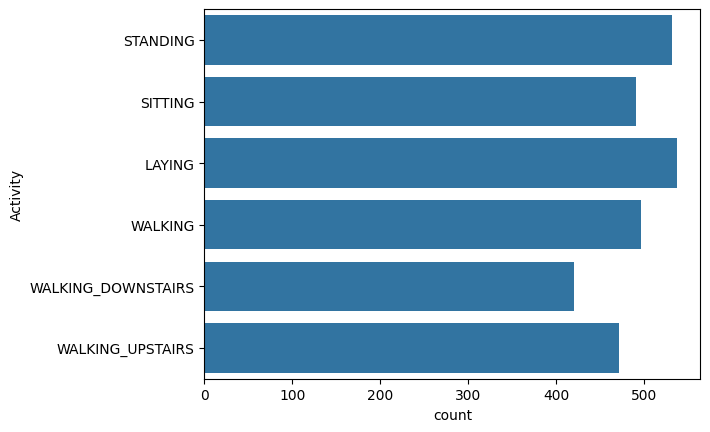

In [47]:
# Plot target label frequency (test)
sns.countplot(test_df['Activity'])

<Axes: xlabel='count', ylabel='Activity'>

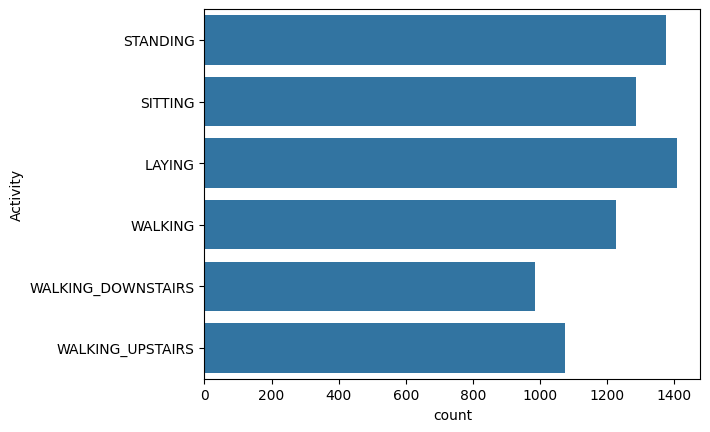

In [48]:
# Plot target label frequency (train)
sns.countplot(train_df['Activity'])

In [49]:
# Isolate features from target variable
target = train_df['Activity']
features = train_df.drop('Activity', axis = 1)

In [50]:
# Encode labels with LabelEncoder
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

In [51]:
# Partition dataset -> 80/20 split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [52]:
# Normalize Features
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [53]:
# Reshape data into 3D tensor, assuming that each sample represents unique moment in time
features_train = features_train.reshape(features_train.shape[0], 1, features_train.shape[1])
features_test = features_test.reshape(features_test.shape[0], 1, features_test.shape[1])

In [54]:
# Assemble RNN
model = keras.models.Sequential([
    keras.layers.LSTM(64, return_sequences = True, input_shape = (features_train.shape[1], features_train.shape[2])),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(32),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation = 'softmax')
])

/Users/langtowl/miniconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
# Compile Model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [57]:
# Train Model
history = model.fit(features_train, target_train, epochs = 10, batch_size = 16, validation_data =(features_test, target_test), verbose = 2)

Epoch 1/10
368/368 - 6s - 16ms/step - accuracy: 0.9633 - loss: 0.0976 - val_accuracy: 0.9748 - val_loss: 0.0792
Epoch 2/10
368/368 - 6s - 17ms/step - accuracy: 0.9663 - loss: 0.0908 - val_accuracy: 0.9742 - val_loss: 0.0778
Epoch 3/10
368/368 - 6s - 17ms/step - accuracy: 0.9731 - loss: 0.0739 - val_accuracy: 0.9708 - val_loss: 0.0873
Epoch 4/10
368/368 - 6s - 16ms/step - accuracy: 0.9726 - loss: 0.0767 - val_accuracy: 0.9776 - val_loss: 0.0838
Epoch 5/10
368/368 - 6s - 16ms/step - accuracy: 0.9787 - loss: 0.0599 - val_accuracy: 0.9674 - val_loss: 0.0837
Epoch 6/10
368/368 - 6s - 16ms/step - accuracy: 0.9759 - loss: 0.0642 - val_accuracy: 0.9694 - val_loss: 0.0815
Epoch 7/10
368/368 - 6s - 16ms/step - accuracy: 0.9784 - loss: 0.0590 - val_accuracy: 0.9782 - val_loss: 0.0757
Epoch 8/10
368/368 - 6s - 16ms/step - accuracy: 0.9820 - loss: 0.0533 - val_accuracy: 0.9776 - val_loss: 0.0669
Epoch 9/10
368/368 - 6s - 16ms/step - accuracy: 0.9849 - loss: 0.0458 - val_accuracy: 0.9762 - val_loss:

In [58]:
# Evaluate Model
test_loss, test_acc = model.evaluate(features_test, target_test)
print(f"Test Accuracy: {test_acc:.4f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9799 - loss: 0.0538
Test Accuracy: 0.9714
